In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 配置字体
plt.rcParams['font.sans-serif'] = ['Times New Roman']  # 使用 Times New Roman
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 加载数据
df1 = pd.read_excel('./data/liziqi_Commemts.xlsx')
df2 = pd.read_excel('./data/liziqi_MainData.xlsx')


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 配置字体
plt.rcParams['font.sans-serif'] = ['Times New Roman']  # 使用 Times New Roman
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 加载数据
df1 = pd.read_excel('./data/liziqi_Commemts.xlsx')
df2 = pd.read_excel('./data/liziqi_MainData.xlsx')

# df1只保留content、emotion、pub_time
df1 = df1[['content', 'emotion', 'pub_time']]

# df2只保留content、emotion、publish_time
df2 = df2[['content', 'emotion', 'publish_time']]
df1.rename(columns={'pub_time': 'publish_time'}, inplace=True)



In [38]:

# 合并两个 DataFrame
merged_df = pd.concat([df1, df2], axis=0)

merged_df

,content,emotion,publish_time
0,@tanyarlfes malah diingetin😔 gue udah lupa dahal😔,Disappointment,2024-11-02 10:24:09
1,You know it's time for something else when:\n\...,Objective,2024-03-20 23:28:34
2,@tanyarlfes Pernah dibahas di channel hirotada...,Objective,2024-11-02 09:48:24
3,@tanyarlfes oh iya y nder🧐,Neutral,2024-11-02 09:45:48
4,@tanyarlfes Iya padahal contentnya bagus bagus,Disappointment,2024-11-02 09:47:07
...,...,...,...
224,All is okay on my end because Liziqi is postin...,Positive,2024-11-16
225,Liziqi is back omg,Positive,2024-11-16
226,omg new liziqi uploads,Positive,2024-11-16
227,bugün güne o kadarrrr enerjik başladım ki!!iki...,Positive,2024-11-16


In [39]:

# 对于publish_time列，将其转换为统一的格式 年-月-日
def convert_time(time):
    try:
        return datetime.strptime(time, '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')
    except:
        return time

merged_df['publish_time'] = merged_df['publish_time'].apply(convert_time)


# 格式化日期
merged_df['publish_time'] = pd.to_datetime(merged_df['publish_time'], format='%Y-%m-%d', errors='coerce')

# 填充缺失值
merged_df.fillna({'emotion': 'Unknown'}, inplace=True)

# 提取主要分析列
analyzed_df = merged_df


In [40]:
analyzed_df

,content,emotion,publish_time
0,@tanyarlfes malah diingetin😔 gue udah lupa dahal😔,Disappointment,2024-11-02
1,You know it's time for something else when:\n\...,Objective,2024-03-20
2,@tanyarlfes Pernah dibahas di channel hirotada...,Objective,2024-11-02
3,@tanyarlfes oh iya y nder🧐,Neutral,2024-11-02
4,@tanyarlfes Iya padahal contentnya bagus bagus,Disappointment,2024-11-02
...,...,...,...
224,All is okay on my end because Liziqi is postin...,Positive,2024-11-16
225,Liziqi is back omg,Positive,2024-11-16
226,omg new liziqi uploads,Positive,2024-11-16
227,bugün güne o kadarrrr enerjik başladım ki!!iki...,Positive,2024-11-16


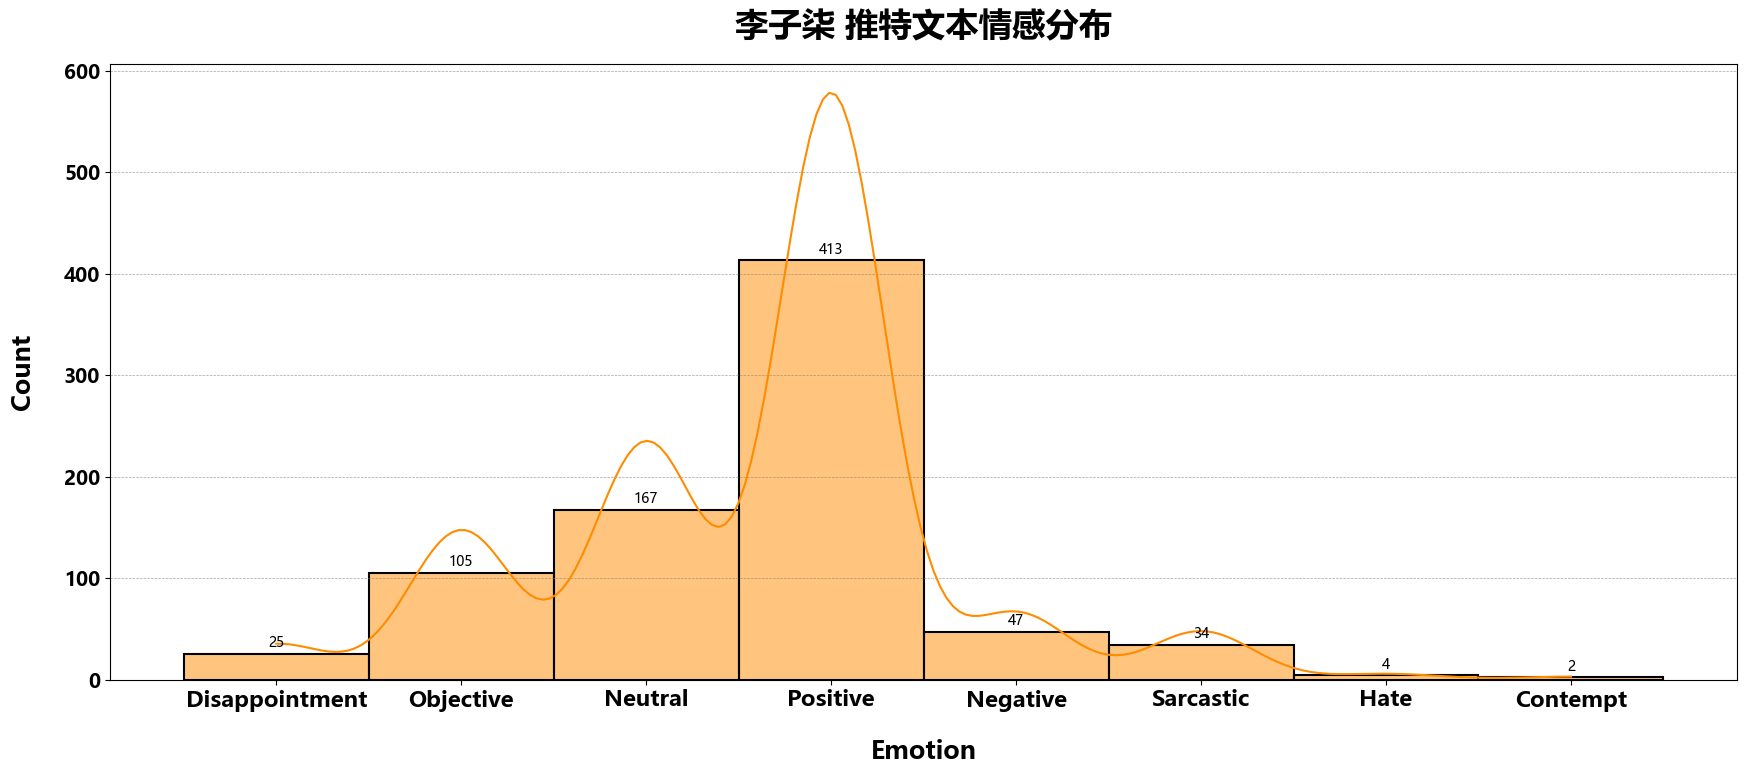

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置默认字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 绘制情感分布带KDE的条形图
def plot_emotion_distribution(df, column, output_path=None):
    # 数据有效性检查
    if df.empty or column not in df.columns:
        raise ValueError(f"Invalid DataFrame or column '{column}' not found.")
    if df[column].isna().all():
        raise ValueError(f"Column '{column}' contains only NaN values.")
    
    plt.figure(figsize=(21, 8))
    ax = sns.histplot(
        data=df,
        x=column,
        stat="count",
        kde=True,
        color='darkorange',  # 设置单一颜色
        edgecolor="black",
        linewidth=1.5
    )
    plt.title('李子柒 推特文本情感分布', fontsize=24, fontweight='bold', pad=20)
    plt.xlabel('Emotion', fontsize=18, fontweight='bold', labelpad=20)
    plt.ylabel('Count', fontsize=18, fontweight='bold', labelpad=20)
    plt.xticks(fontsize=16, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7, color='gray')
    
    # 为每个柱状图顶部添加数值标签
    for p in ax.patches:
        if p.get_height() > 0:  # 仅在高度大于 0 时添加标签
            ax.annotate(
                f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize=10,
                color='black',
            )
    
    if output_path:
        plt.savefig(output_path, bbox_inches='tight', dpi=300)
    plt.show()


# 使用示例
plot_emotion_distribution(analyzed_df, column='emotion', output_path="liziqi_emotion_distribution.png")


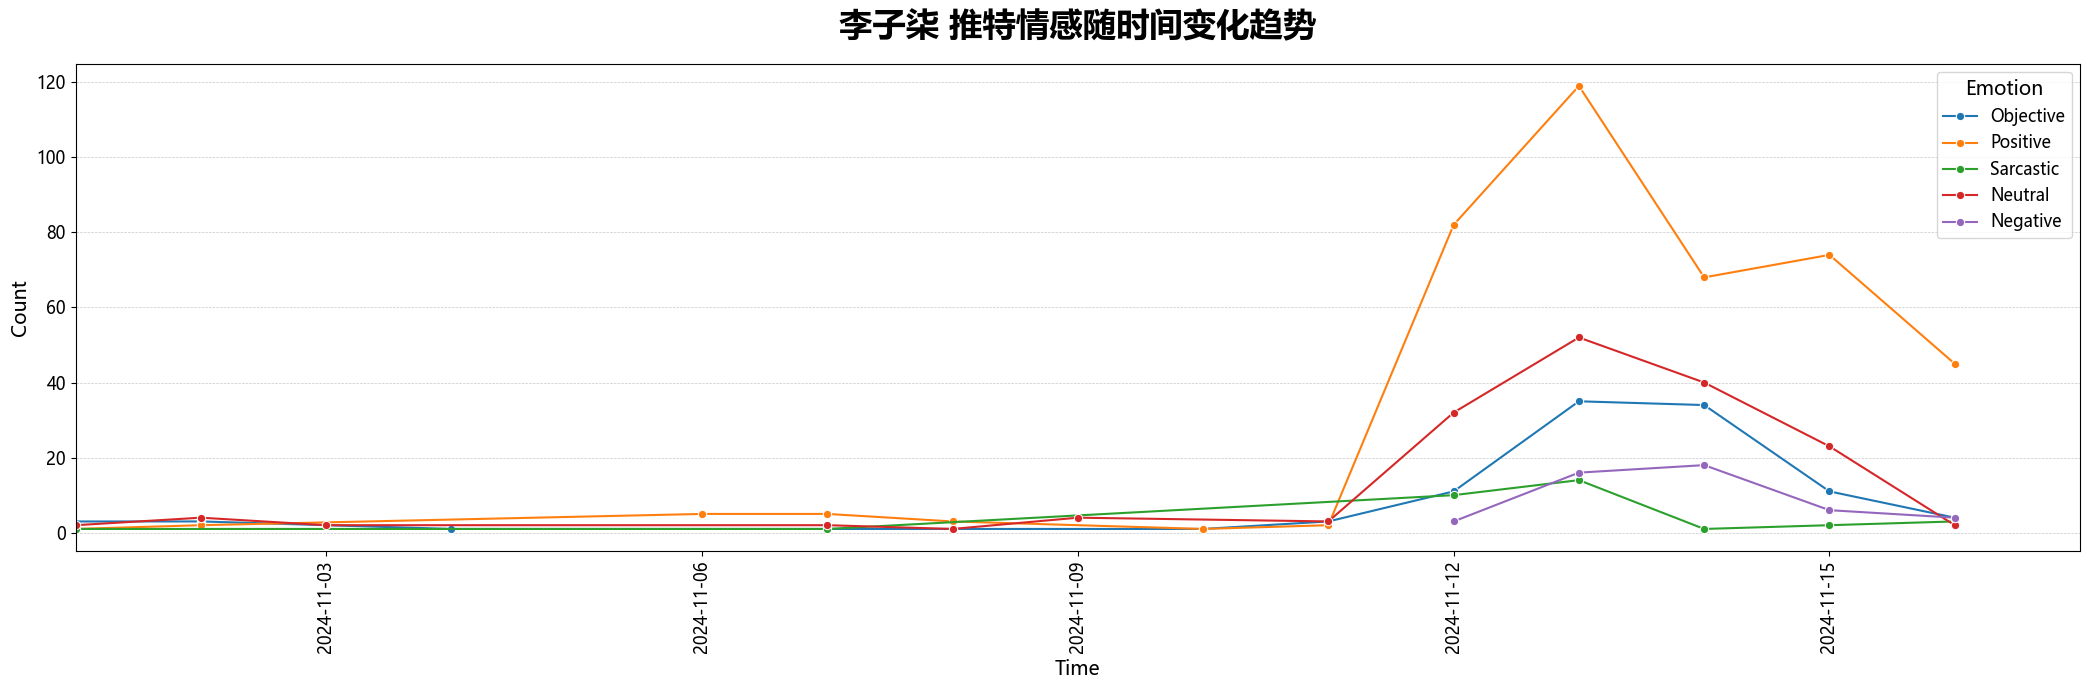

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates

def plot_emotion_time_trend(df, time_column, emotion_column, output_path=None):
    """
    绘制情感随时间变化的折线图，根据情感正负设置颜色。
    :param df: 数据 DataFrame
    :param time_column: 时间列名
    :param emotion_column: 情感列名
    :param output_path: 输出图片路径
    """
    # 确保时间列为 datetime 格式
    df[time_column] = pd.to_datetime(df[time_column])

    # 获取情感出现频率的前五种
    top_emotions = df[emotion_column].value_counts().head(5).index
    filtered_df = df[df[emotion_column].isin(top_emotions)]

    # 按时间和情感统计数量
    time_emotion_trend = (
        filtered_df.groupby([time_column, emotion_column])
        .size()
        .reset_index(name="count")
        .sort_values(by=time_column)
    )

    # 绘制折线图
    plt.figure(figsize=(21, 7))
    sns.lineplot(
        data=time_emotion_trend,
        x=time_column,
        y="count",
        hue=emotion_column,
        marker="o",
    )

    # 美化图形
    plt.title("李子柒 推特情感随时间变化趋势", fontsize=24, fontweight="bold", pad=20)
    plt.xlabel("Time", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)
    plt.legend(title="Emotion", fontsize=12, title_fontsize=14)

    # 设置横轴日期刻度间隔和格式
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))  # 每3天显示一个刻度
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))  # 格式化日期
    # plt.xlim(df[time_column].min(), df[time_column].max())  # 设置横轴范围
    # 设置横轴范围，从2024-10-18到2024-11-17
    plt.xlim(pd.Timestamp("2024-11-01"), pd.Timestamp("2024-11-17"))

    plt.tight_layout()

    # 保存图像
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches="tight")
    plt.show()

# 使用示例
plot_emotion_time_trend(
    analyzed_df,
    time_column="publish_time",
    emotion_column="emotion",
    output_path="liziqi_emotion_time_trend_colored.png"
)
